In [68]:
import os
from glob import glob
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split



In [23]:
data_path_to = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/'
os.path.exists(data_path_to)

True

In [31]:
local_data_path_to="Data/Training-Splitted/"
os.path.exists(local_data_path_to)

True

In [15]:
img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/Annotation/'
files = sorted(os.listdir(data_path))
#print(files)


    

In [16]:
pixel_count=[]
for f in files:
    label = Image.open(img_data_path+f)
    label = np.array(label)
    label = tf.convert_to_tensor(label)
    label = tf.cast(label, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    pixel_count.append(np.sum(label))


In [17]:
print(pixel_count)

[1632, 1608, 1924, 2496, 1536, 2628, 2628, 1464, 2032, 1308, 2320, 2288, 1812, 2712, 2032, 2748, 2224, 2744, 1644, 1624, 2884, 1736, 3376, 1452, 1768, 2412, 1516, 1688, 1876, 1888, 2732, 2344, 1696, 2076, 2092, 2172, 3016, 2836, 2208, 3292, 2388, 2576, 2576, 1612, 2912, 2960, 2080, 1800, 3300, 2760, 2300, 2088, 3044, 2564, 1624, 2316, 1552, 2956, 2832, 3024, 1860, 3576, 3508, 2860, 1452, 2840, 3108, 2832, 2288, 2212, 2092, 3172, 2180, 3524, 2200, 1424, 1604, 3680, 3452, 2664, 1856, 3084, 2644, 2420, 2976, 2608, 3112, 2992, 1508, 1500, 2696, 2536, 2536, 2140, 2920, 3308, 3100, 2900, 2080, 3404, 2756, 2628, 3168, 3000, 2100, 2116, 3628, 1432, 3468, 2080, 1592, 1836, 1880, 1924, 1788, 3016, 3336, 2036, 2320, 3264, 3472, 3560, 3400, 2340, 1936, 1732, 2600, 2672, 2772, 2468, 2920, 3536, 2168, 3324, 1468, 2912, 2476, 2388, 2364, 2648, 2736, 3084, 2660, 3136, 3384, 1704, 2032, 2628, 2992, 2968, 3188, 2256, 2964, 3076, 3232, 3192, 3080, 3076, 3060, 3148, 3016, 2544, 1508, 3420, 2784, 3336, 235

In [32]:
train_pixel_sz_HC_file = local_data_path_to + 'training_set_pixel_size_and_HC.csv'
os.path.exists(train_pixel_sz_HC_file)

True

In [40]:
train_pixel_sz_HC_df = pd.read_csv(train_pixel_sz_HC_file)
train_pixel_sz_HC_df.head()

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [35]:
for filname in train_pixel_sz_HC_df['filename'], read file

0      000_HC.png
1      001_HC.png
2      002_HC.png
3      003_HC.png
4      004_HC.png
          ...    
994    801_HC.png
995    802_HC.png
996    803_HC.png
997    804_HC.png
998    805_HC.png
Name: filename, Length: 999, dtype: object

In [45]:
# Define a function to update the filename
def update_filename(filename):
    return filename.replace(".png", "_Annotation.png")

# Apply the function to create a new column with updat filenames
train_pixel_sz_HC_df['anno_filename'] = train_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))


In [46]:
train_pixel_sz_HC_df.head()

,filename,pixel size(mm),head circumference (mm),anno_filename
0,000_HC.png,0.069136,44.30,000_HC_Annotation.png
1,001_HC.png,0.089659,56.81,001_HC_Annotation.png
2,002_HC.png,0.062033,68.75,002_HC_Annotation.png
3,003_HC.png,0.091291,69.00,003_HC_Annotation.png
4,004_HC.png,0.061240,59.81,004_HC_Annotation.png


In [56]:
def get_pixel_count(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count

train_pixel_sz_HC_df['pixel_count'] = train_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(img_data_path, x))


No such file: 002_HC_Annotation.png
No such file: 011_HC_Annotation.png
No such file: 014_3HC_Annotation.png
No such file: 014_HC_Annotation.png
No such file: 015_HC_Annotation.png
No such file: 017_HC_Annotation.png
No such file: 020_HC_Annotation.png
No such file: 023_HC_Annotation.png
No such file: 030_HC_Annotation.png
No such file: 032_2HC_Annotation.png
No such file: 033_HC_Annotation.png
No such file: 034_HC_Annotation.png
No such file: 036_HC_Annotation.png
No such file: 041_HC_Annotation.png
No such file: 043_HC_Annotation.png
No such file: 044_HC_Annotation.png
No such file: 045_HC_Annotation.png
No such file: 047_HC_Annotation.png
No such file: 050_2HC_Annotation.png
No such file: 055_HC_Annotation.png
No such file: 057_HC_Annotation.png
No such file: 059_HC_Annotation.png
No such file: 061_HC_Annotation.png
No such file: 065_HC_Annotation.png
No such file: 066_HC_Annotation.png
No such file: 070_HC_Annotation.png
No such file: 086_HC_Annotation.png
No such file: 088_2HC_Ann

No such file: 621_HC_Annotation.png
No such file: 622_HC_Annotation.png
No such file: 624_HC_Annotation.png
No such file: 625_HC_Annotation.png
No such file: 631_2HC_Annotation.png
No such file: 632_HC_Annotation.png
No such file: 639_2HC_Annotation.png
No such file: 640_HC_Annotation.png
No such file: 642_HC_Annotation.png
No such file: 643_HC_Annotation.png
No such file: 644_HC_Annotation.png
No such file: 653_HC_Annotation.png
No such file: 655_HC_Annotation.png
No such file: 656_HC_Annotation.png
No such file: 657_2HC_Annotation.png
No such file: 661_HC_Annotation.png
No such file: 664_HC_Annotation.png
No such file: 666_HC_Annotation.png
No such file: 667_HC_Annotation.png
No such file: 669_HC_Annotation.png
No such file: 670_HC_Annotation.png
No such file: 671_2HC_Annotation.png
No such file: 671_3HC_Annotation.png
No such file: 675_2HC_Annotation.png
No such file: 676_HC_Annotation.png
No such file: 681_HC_Annotation.png
No such file: 682_HC_Annotation.png
No such file: 683_HC_A

In [59]:
train_pixel_sz_HC_df.head()

,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count
0,000_HC.png,0.069136,44.30,000_HC_Annotation.png,1632.0
1,001_HC.png,0.089659,56.81,001_HC_Annotation.png,1608.0
2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,NaN
3,003_HC.png,0.091291,69.00,003_HC_Annotation.png,1924.0
4,004_HC.png,0.061240,59.81,004_HC_Annotation.png,2496.0


In [61]:
# Remove rows with missing values
cleaned_df = train_pixel_sz_HC_df.dropna()


In [62]:
#Set target
target_name ='head circumference (mm)'

y = cleaned_df[target_name]


In [90]:
#Set Input Feature X = [x1,, x2]
feature_names = ['pixel_count','pixel size(mm)']
X = cleaned_df[feature_names]


In [111]:
# do linear regression mmodel first
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)


In [112]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train1, y_train1)


LinearRegression()

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred1 = model1.predict(X_test1)

# Calculate evaluation metrics
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)

print("Mean Squared Error of linear regression : ", mse1, ("(mm)"))
print("R-squared Score:", r2_1)


Mean Squared Error of linear regression :  153.52956956143774 (mm)
R-squared Score: 0.9683489078344308


In [114]:
np.average(y_pred1)

166.21367948492275

In [115]:
train_pixel_sz_HC_df[target_name].mean()

174.38309309309312

In [87]:
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

print("Coefficients:", model1.coef_[0])
print("Coefficients:", model1.coef_[1])



Intercept: -153.8930737171353
Coefficients: [5.48906510e-02 1.08340051e+03]
Coefficients: 0.05489065103196005
Coefficients: 1083.4005118670234


In [ ]:
### what do yu think ?

In [91]:
print(feature_names)

['pixel_count', 'pixel size(mm)']


In [ ]:
# regress model 2

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [96]:
# Split into validation and training data
#Train Random forest model on train_x train_y
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 4


In [80]:
# To improve accuracy, create a new Random Forest model which I will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(random_state=1)

In [117]:
rf_model_on_full_data.feature_importances_
feature_importance = rf_model_on_full_data.feature_importances_

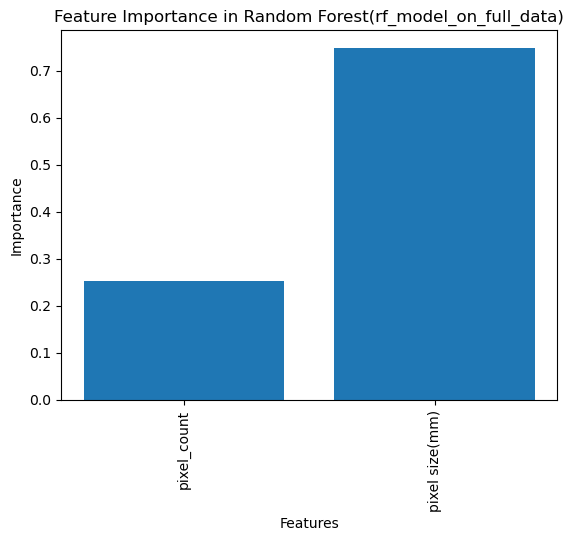

In [118]:
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest(rf_model_on_full_data)')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#prediction with 

In [123]:
# prediction on new data
new_data = pd.DataFrame({'pixel_count': [500, 600], 'pixel size(mm)': [30, 35]})
prediction1 = model1.predict(new_data)
prediction2 = rf_model.predict(new_data)

print("Predicted Head Circum with linear regression", prediction1)
print("Predicted Head Circum with random tree regression", prediction2)

Predicted Head Circum with linear regression [32445.48672881 37879.94344786]
Predicted Head Circum with random tree regression [240.2776 240.2776]


In [127]:
val_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'

In [122]:
test_pixel_sz_HC_file = local_data_path_to + 'test_set_pixel_size.csv'
os.path.exists(test_pixel_sz_HC_file )

True

In [124]:
test_pixel_sz_HC_df = pd.read_csv(test_pixel_sz_HC_file)
test_pixel_sz_HC_df.head()

,filename,pixel size(mm)
0,000_HC.png,0.235857
1,001_HC.png,0.067973
2,002_HC.png,0.165202
3,003_HC.png,0.096674
4,004_HC.png,0.202203


In [120]:
def get_pixel_count2(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count


In [129]:
test_pixel_sz_HC_df['anno_filename'] = test_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))

In [130]:
test_pixel_sz_HC_df['pixel_count'] = test_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(val_img_data_path, x))


No such file: 000_HC_Annotation.png
No such file: 001_HC_Annotation.png
No such file: 003_HC_Annotation.png
No such file: 004_HC_Annotation.png
No such file: 005_HC_Annotation.png
No such file: 006_HC_Annotation.png
No such file: 007_HC_Annotation.png
No such file: 008_HC_Annotation.png
No such file: 009_HC_Annotation.png
No such file: 010_HC_Annotation.png
No such file: 012_HC_Annotation.png
No such file: 013_HC_Annotation.png
No such file: 016_HC_Annotation.png
No such file: 018_HC_Annotation.png
No such file: 019_HC_Annotation.png
No such file: 021_HC_Annotation.png
No such file: 022_HC_Annotation.png
No such file: 024_HC_Annotation.png
No such file: 025_HC_Annotation.png
No such file: 026_HC_Annotation.png
No such file: 027_HC_Annotation.png
No such file: 028_HC_Annotation.png
No such file: 029_HC_Annotation.png
No such file: 031_HC_Annotation.png
No such file: 032_HC_Annotation.png
No such file: 035_HC_Annotation.png
No such file: 037_HC_Annotation.png
No such file: 038_HC_Annotat

In [132]:
cleaned_test_df=test_pixel_sz_HC_df.dropna()

In [134]:
cleaned_test_df[feature_names].head()

,pixel_count,pixel size(mm)
2,2820.0,0.165202
11,3208.0,0.142794
14,2044.0,0.132663
15,2928.0,0.235724
17,2228.0,0.128554


In [135]:
new_test_data = cleaned_test_df[feature_names].head()


In [136]:
prediction1 = model1.predict(new_test_data)  #linear regression model .  prediction unit = mm ?
print(prediction1)

[179.76208483 176.91005656 101.47394992 262.31180292 107.19853042]


In [138]:
prediction2 = rf_model.predict(new_test_data) #random tree regression is known better in avoid overfitting. 
print(prediction2)

[181.9931 180.8971  98.7757 272.2664 109.1821]
